Importing the necessary libraries

In [6]:
import numpy as np 
import pandas as pd 
from pandas.plotting import autocorrelation_plot as auto_corr


In [5]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns
import missingno as msno

In [4]:
import math
from datetime import datetime
from datetime import timedelta

In [1]:
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [7]:
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [8]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
pd.options.display.max_columns=100

Reading the dataset

In [ ]:
#df11 = pd.read_csv('clean_data.csv')

In [ ]:
#df.head()

In [12]:
df_store = pd.read_csv('stores.csv')

In [13]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
df_train = pd.read_csv('train.csv')

In [15]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
df_features = pd.read_csv('features.csv')

In [17]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
df_test = pd.read_csv('test.csv')

In [19]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [20]:
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


Dropping the Isholiday column

In [21]:
df.drop(['IsHoliday_x'], axis=1,inplace=True)

In [22]:
df.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

In [23]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [24]:
df.shape

(421570, 16)

In [25]:
df['Store'].nunique()

45

In [26]:
df['Dept'].nunique()

81

In [27]:
df.shape

(421570, 16)

Individual values for each title of the column

In [28]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Store,45
Dept,81
Date,143
Weekly_Sales,359464
Temperature,3528
Fuel_Price,892
MarkDown1,2277
MarkDown2,1499
MarkDown3,1662
MarkDown4,1944


In [29]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

check duplicated data

In [30]:
df.duplicated().sum()

0

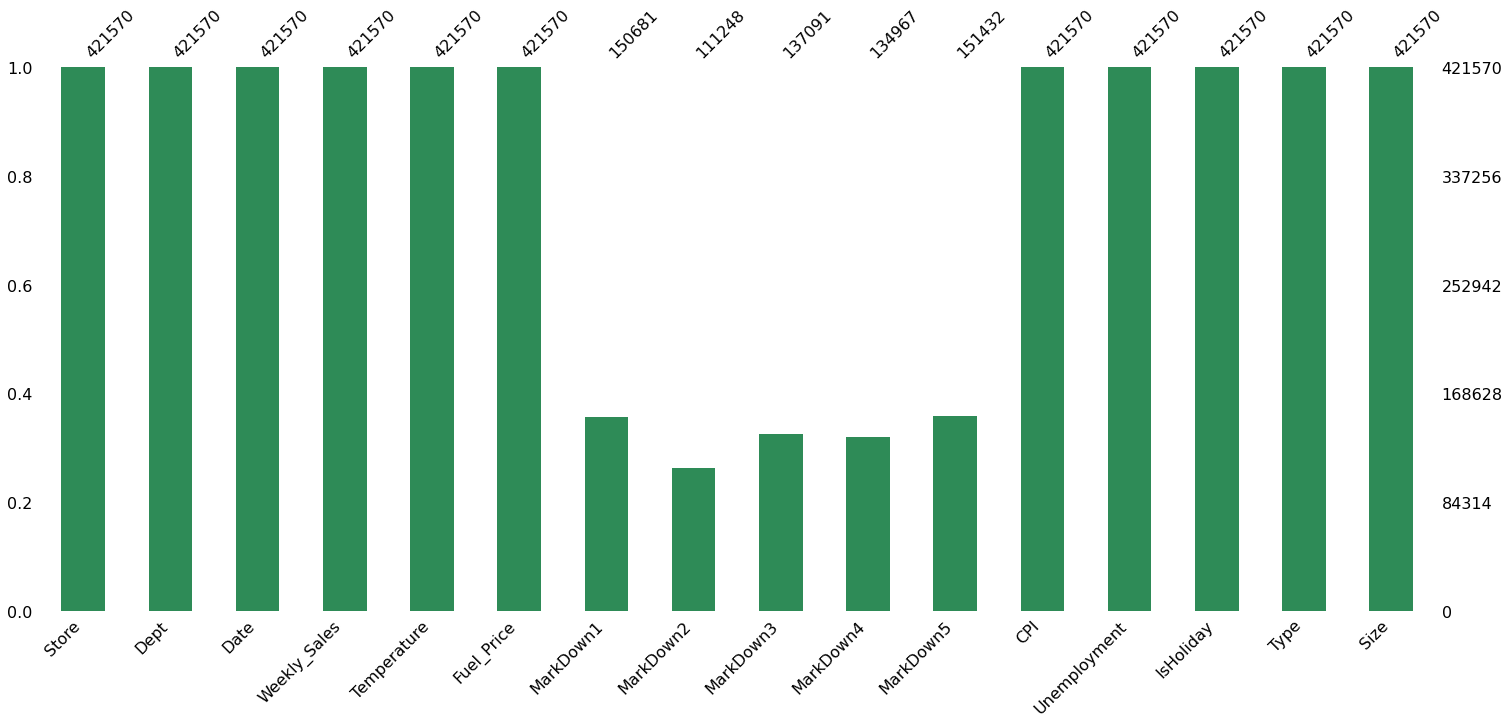

In [31]:
msno.bar(df, color="seagreen")
plt.show()

In [32]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
188,1,47,2010-02-19,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
406,1,47,2010-03-12,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
2549,1,47,2010-10-08,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315
3632,1,54,2011-01-21,-50.00,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False,A,151315
4132,1,47,2011-03-11,0.00,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False,B,118221
420403,45,49,2012-06-29,-34.00,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False,B,118221
420736,45,49,2012-08-03,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,B,118221
421007,45,54,2012-08-31,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221


# Exploratory data analysis

The data consists of certain period from february 5th 2010 to october 26th 2012

In [33]:
df['Date'].head(5).append(df['Date'].tail(5)) 

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

In [34]:
test = df.groupby('Type').describe()['Size'].round(2)

In [35]:
test

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,215478.0,182231.29,41534.53,39690.0,158114.0,202505.0,203819.0,219622.0
B,163495.0,101818.74,30921.78,34875.0,93188.0,114533.0,123737.0,140167.0
C,42597.0,40535.73,1194.43,39690.0,39690.0,39910.0,41062.0,42988.0


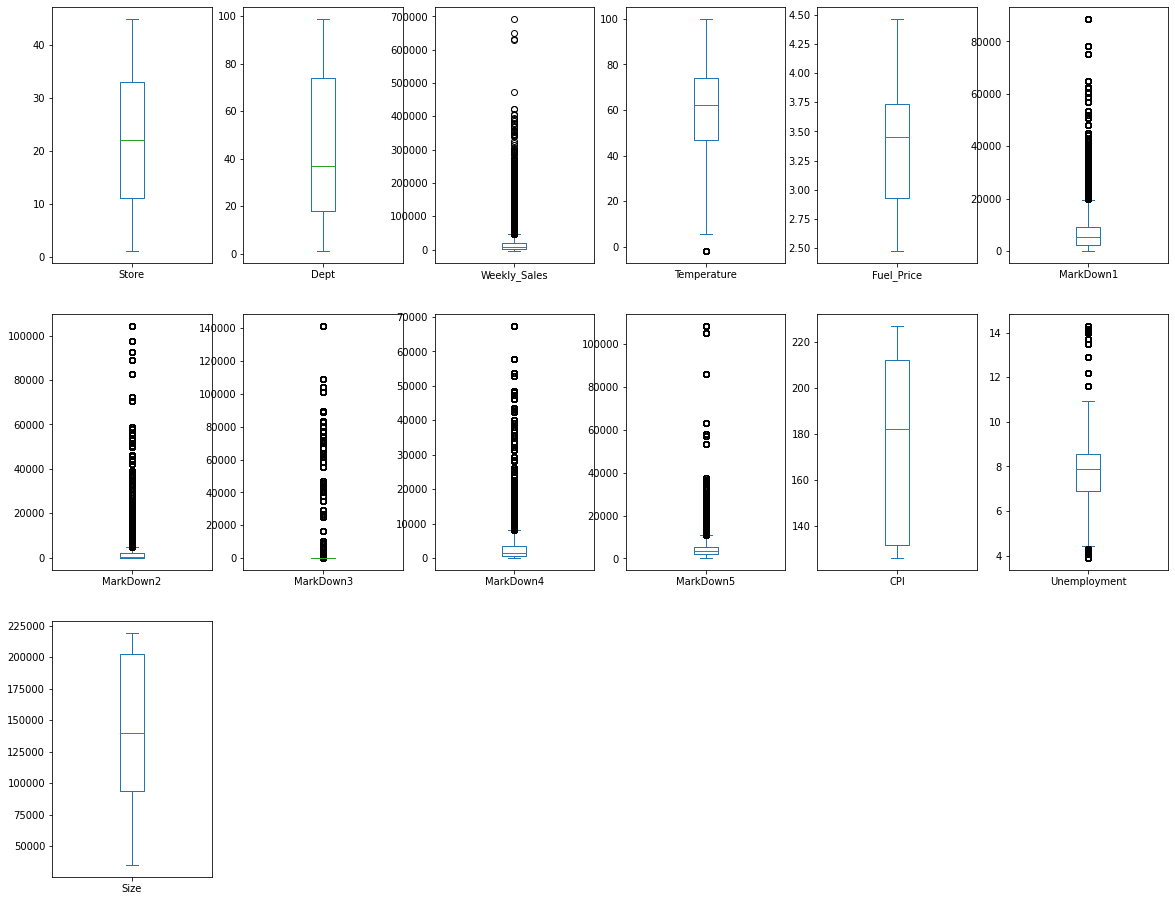

In [36]:
df.plot(kind='box',layout=(3,6),subplots=1,figsize=(20,16))
plt.show()

In [39]:
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

Text(0.5, 0, 'Month')

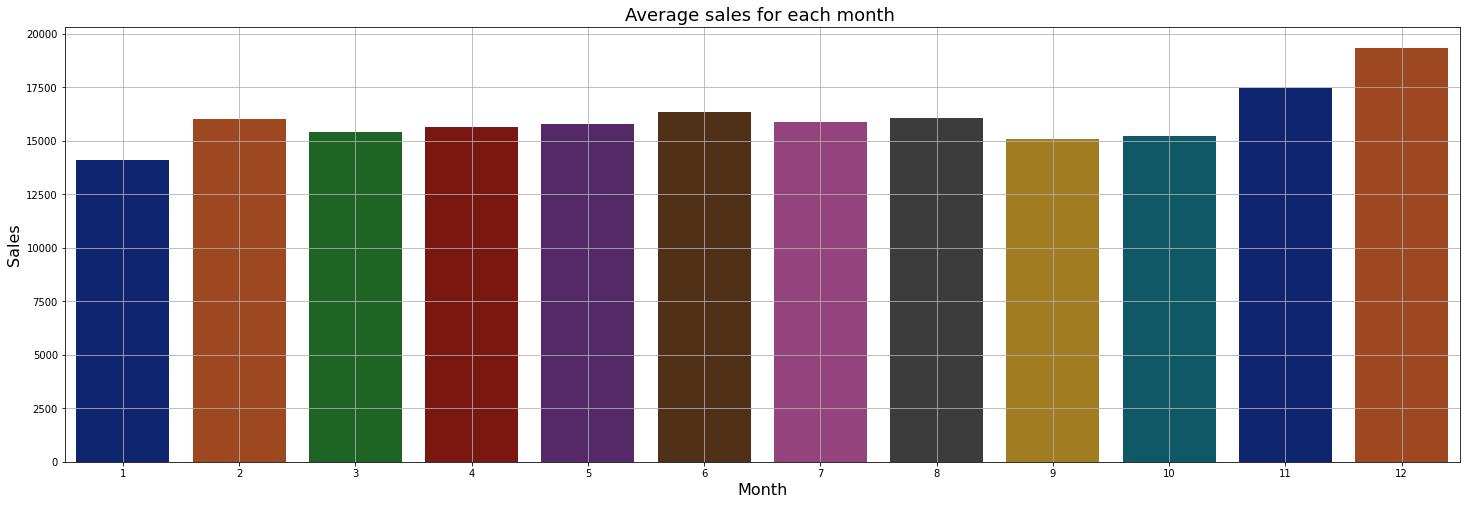

In [40]:
weekly_sales = df['Weekly_Sales'].groupby(df['month']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average sales for each month ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)


# Box Plot

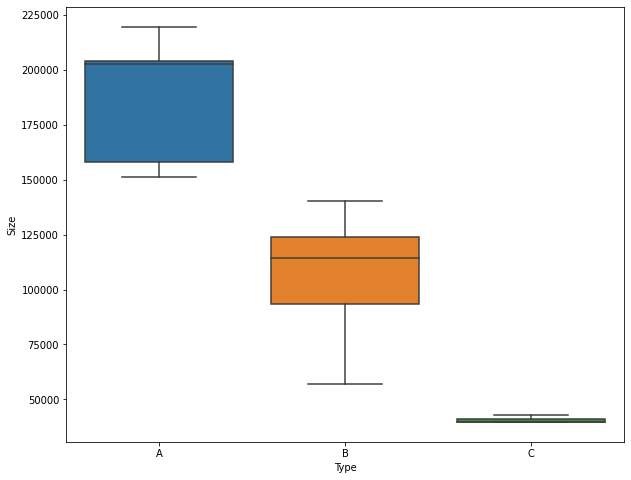

In [41]:
plt.figure(figsize=(10,8)) 
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

In [42]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [43]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [44]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [45]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

# Bar Plot

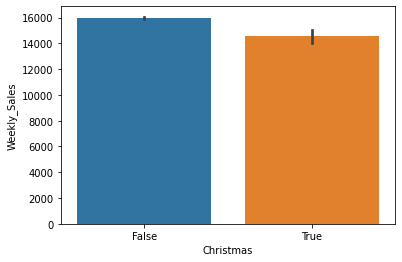

In [46]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)

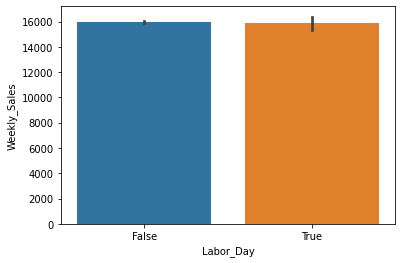

In [47]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)

In [48]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20126.297990
           B       12249.152357
           C        9541.691864
True       A       18231.031306
           B       11394.051524
           C        7963.228980
Name: Weekly_Sales, dtype: float64

In [49]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20102.291095
           B       12241.858749
           C        9512.019024
True       A       19973.219881
           B       12013.482757
           C        9871.225746
Name: Weekly_Sales, dtype: float64

In [50]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean() 

Thanksgiving  Type
False         A       19995.309014
              B       12144.563438
              C        9517.272388
True          A       27370.728296
              B       18661.296519
              C        9679.900152
Name: Weekly_Sales, dtype: float64

In [51]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20088.683671
            B       12233.518469
            C        9506.055492
True        A       20603.690832
            B       12401.718198
            C       10156.204711
Name: Weekly_Sales, dtype: float64

# Area Specification

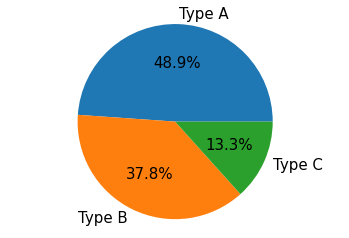

In [52]:
my_data = [48.88, 37.77 , 13.33 ]  
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) 
plt.axis('equal')
mpl.rcParams.update({'font.size': 20})

plt.show()

In [53]:
df.groupby('Fuel_Price')['Temperature'].mean()

Fuel_Price
2.472    45.660000
2.513    80.580000
2.514    42.657837
2.520    50.870000
2.533    82.290000
           ...    
4.294    66.470413
4.301    68.464444
4.308    86.400000
4.449    70.898296
4.468    74.204321
Name: Temperature, Length: 892, dtype: float64

# Group Bar Plot

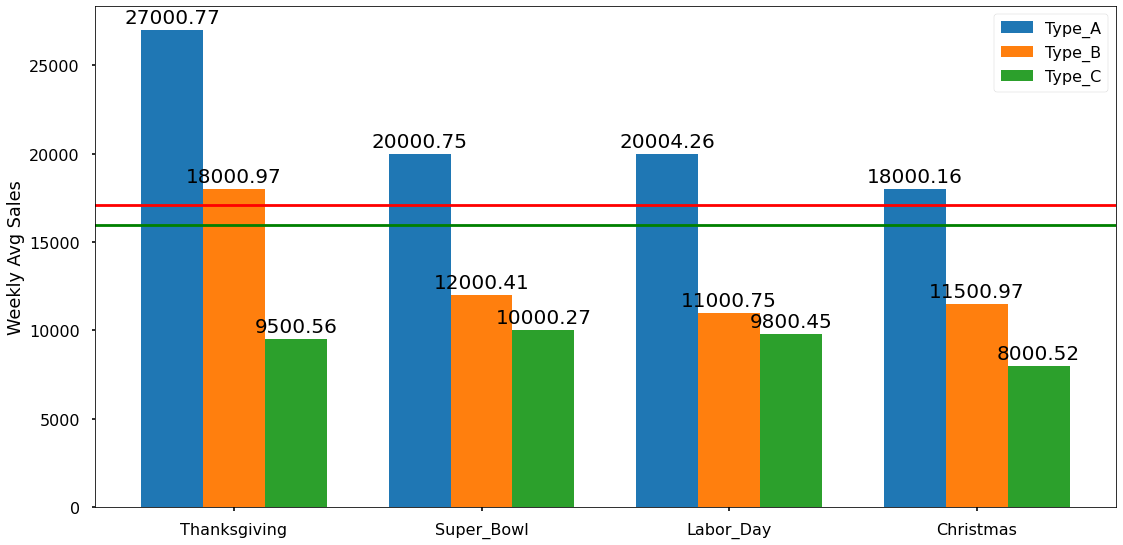

In [54]:
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27000.77, 20000.75, 20004.26, 18000.16]
B_means = [18000.97, 12000.41, 11000.75, 11500.97]
C_means = [9500.56,10000.27,9800.45,8000.52]

x = np.arange(len(labels))  
width = 0.25 

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')


ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r')
plt.axhline(y=15952.82,color='green') 

fig.tight_layout()

plt.show()

In [55]:
df.sort_values(by='Weekly_Sales',ascending=True).head(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
269456,28,6,2010-10-08,-4988.94,71.82,3.013,NaN,NaN,NaN,NaN,NaN,126.279167,14.313,False,A,206302,40,10,2010,False,False,False,False
336241,35,47,2011-09-02,-3924.00,71.44,3.703,NaN,NaN,NaN,NaN,NaN,140.196985,8.684,False,B,103681,35,9,2011,False,False,False,False
412178,45,47,2010-02-26,-1750.00,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,False,B,118221,8,2,2010,False,False,False,False
155177,16,47,2012-03-09,-1699.00,28.16,3.286,5302.57,557.02,3.17,5974.36,3037.04,196.963160,6.162,False,B,57197,10,3,2012,False,False,False,False
271178,28,32,2011-03-25,-1321.48,54.40,3.909,NaN,NaN,NaN,NaN,NaN,128.616064,14.021,False,A,206302,12,3,2011,False,False,False,False
12072,2,47,2010-07-30,-1098.00,83.49,2.640,NaN,NaN,NaN,NaN,NaN,211.026468,8.099,False,A,202307,30,7,2010,False,False,False,False
13210,2,47,2010-11-19,-1098.00,50.81,2.771,NaN,NaN,NaN,NaN,NaN,211.547030,8.163,False,A,202307,46,11,2010,False,False,False,False
12854,2,47,2010-10-15,-1098.00,65.80,2.720,NaN,NaN,NaN,NaN,NaN,211.471329,8.163,False,A,202307,41,10,2010,False,False,False,False
25918,3,32,2011-09-30,-1008.96,82.58,3.355,NaN,NaN,NaN,NaN,NaN,220.085696,7.567,False,B,37392,39,9,2011,False,False,False,False
31867,4,47,2010-09-17,-898.00,64.91,2.594,NaN,NaN,NaN,NaN,NaN,126.145467,7.372,False,A,205863,37,9,2010,False,False,False,False


In [56]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
week                 0
month                0
year                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [57]:
df = df.fillna(0)

In [58]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
week            0
month           0
year            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [59]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


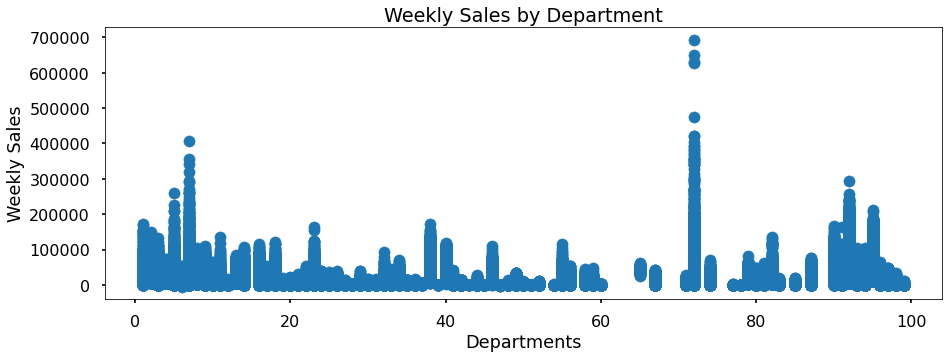

In [60]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

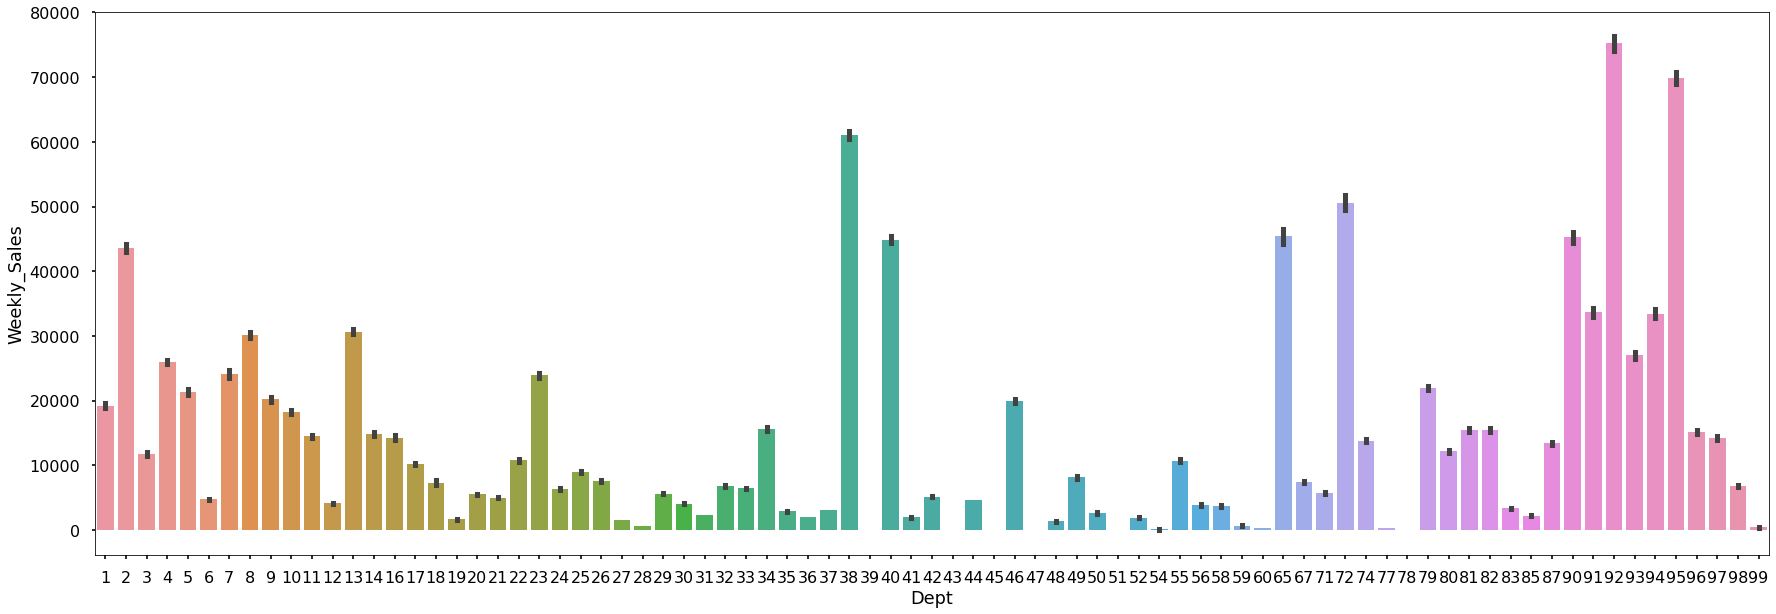

In [61]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

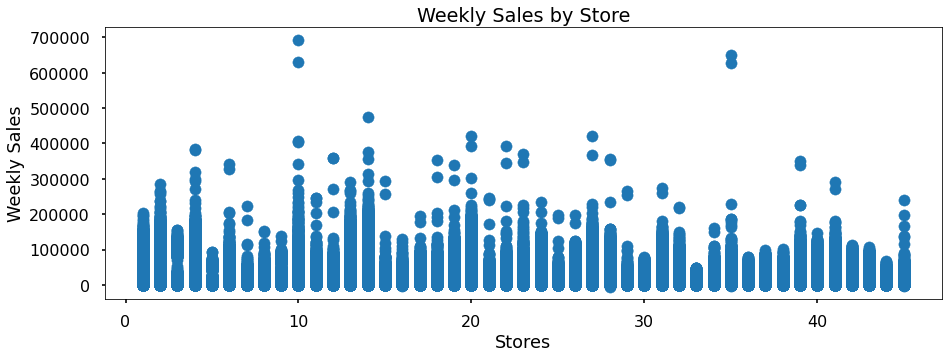

In [62]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

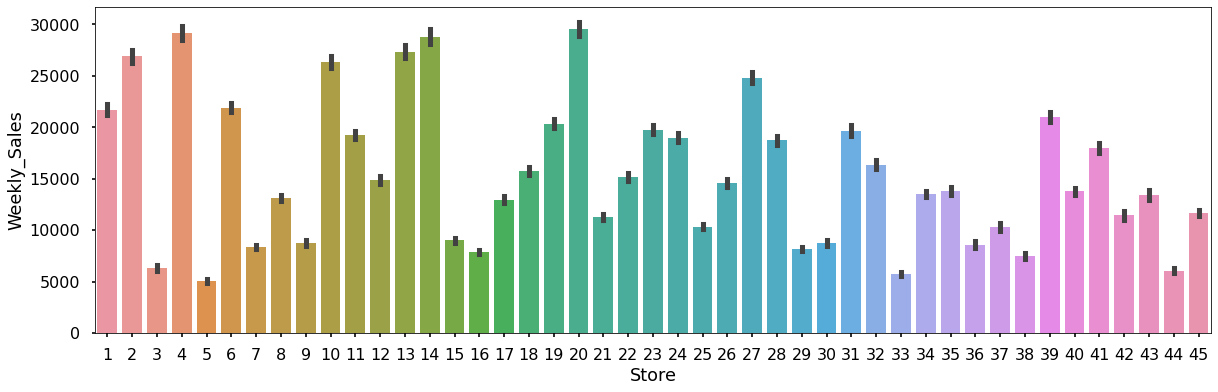

In [63]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [64]:
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [65]:
df.groupby('month')['Weekly_Sales'].mean() 

month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [66]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

# Sales Plot

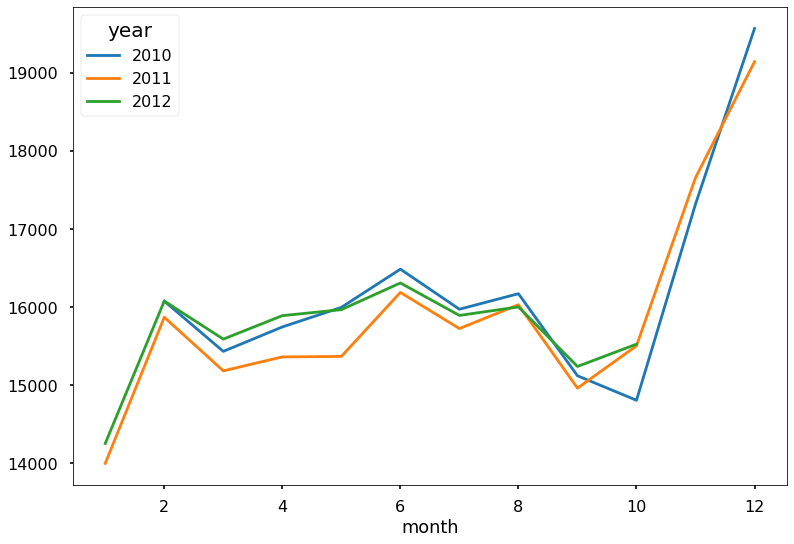

In [67]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

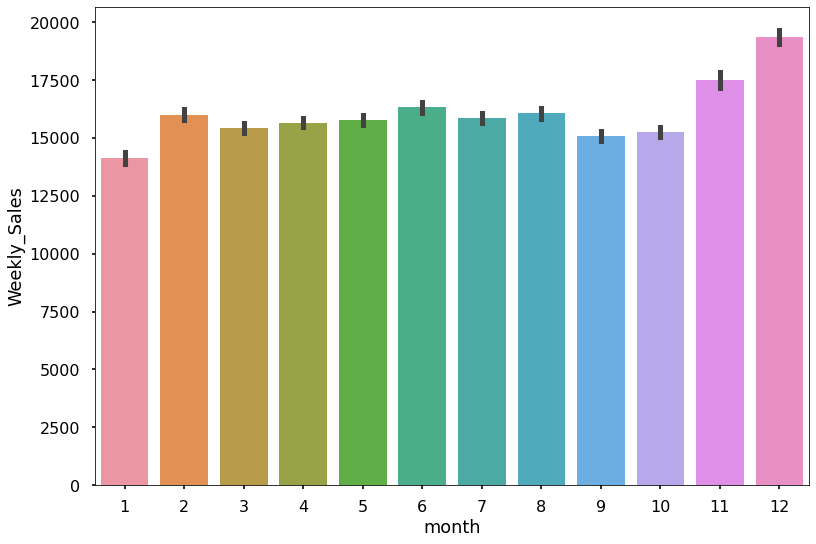

In [68]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [69]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=True).head()

week
4     13530.033667
2     14030.667886
3     14077.870442
39    14485.827993
38    14515.275571
Name: Weekly_Sales, dtype: float64

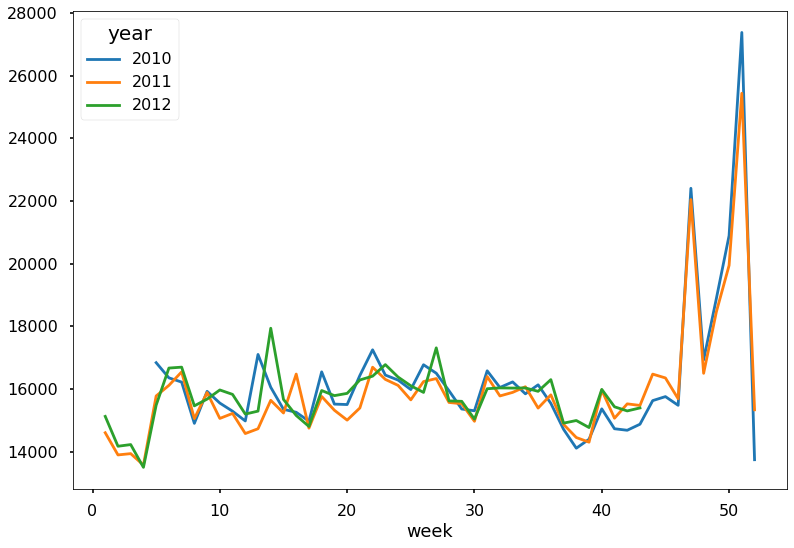

In [70]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

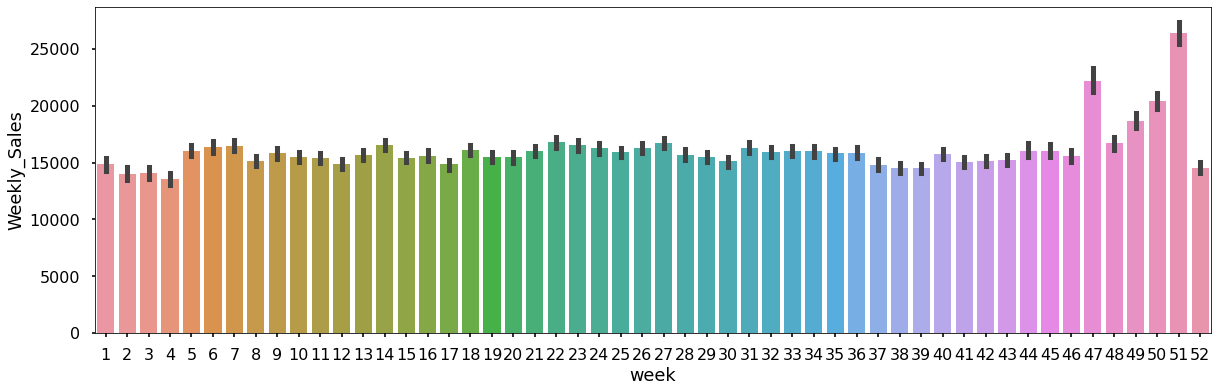

In [71]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

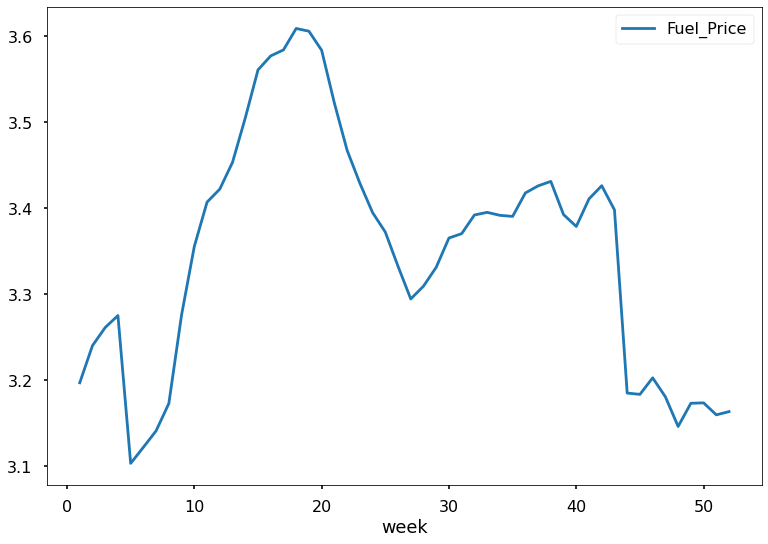

In [72]:
fuel_price = pd.pivot_table(df, values = "Fuel_Price", index= "week")
fuel_price.plot()

In [73]:
pd.options.display.max_columns=100 


In [74]:
df_encoded = df.copy()

In [75]:
type_group = {'A':1, 'B': 2, 'C': 3}  
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [76]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) 

In [77]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) 

In [78]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) 

In [79]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) 

In [80]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)

In [81]:
df_encoded['Temperature'] = df_encoded['Temperature'].astype(bool).astype(int) 

In [82]:
df_new = df_encoded.copy() 

In [83]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) 

In [84]:
print(df_new)

        Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
0           1     1 2010-02-05      24924.50            1       2.572   
1           1     2 2010-02-05      50605.27            1       2.572   
2           1     3 2010-02-05      13740.12            1       2.572   
3           1     4 2010-02-05      39954.04            1       2.572   
4           1     5 2010-02-05      32229.38            1       2.572   
...       ...   ...        ...           ...          ...         ...   
421565     45    93 2012-10-26       2487.80            1       3.882   
421566     45    94 2012-10-26       5203.31            1       3.882   
421567     45    95 2012-10-26      56017.47            1       3.882   
421568     45    97 2012-10-26       6817.48            1       3.882   
421569     45    98 2012-10-26       1076.80            1       3.882   

        MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0            0.00       0.00        0.0       

In [85]:
df_new = df_new.sort_values(by='Date', ascending=True) 

In [86]:
df_new

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,1,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,151315,5,2,2010
330761,35,3,2010-02-05,14612.19,1,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,0,2,103681,5,2,2010
330762,35,4,2010-02-05,26323.15,1,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,0,2,103681,5,2,2010
330763,35,5,2010-02-05,36414.63,1,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,0,2,103681,5,2,2010
330764,35,6,2010-02-05,11437.81,1,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,0,2,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,49,2012-10-26,7770.71,1,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,0,1,219622,43,10,2012
128052,13,50,2012-10-26,1486.00,1,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,0,1,219622,43,10,2012
128053,13,52,2012-10-26,4738.93,1,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,0,1,219622,43,10,2012
390991,41,4,2012-10-26,32699.78,1,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,0,1,196321,43,10,2012


# Heat Map

In [87]:
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask).round(2)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.diverging.RdBu,
                                  hoverinfo="none", 
                                  showscale=True, ygap=1, xgap=1
                                 )

fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Heatmap', 
    title_x=0.5, 
    width=900, 
    height=700,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [88]:
train_data = df_new[:int(0.7*(len(df_new)))] 
test_data = df_new[int(0.7*(len(df_new))):] 

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] 

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [89]:
X = df_new[used_cols]

In [90]:
X_train = X_train.drop(['Date'], axis=1) 
X_test = X_test.drop(['Date'], axis=1)

# Random Forest Regressor

In [91]:
def wmae_test(test, pred): 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [92]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)


In [93]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [94]:
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=35, max_features='sqrt',
                                       min_samples_split=10, n_estimators=50,
                                       n_jobs=-1, random_state=42))])

In [95]:
y_pred = pipe.predict(X_train)


In [96]:
y_pred_test = pipe.predict(X_test)

In [97]:
wmae_test(y_test, y_pred_test)

6574.896623397987

In [98]:
df_encoded_new = df_encoded.copy() 
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [99]:
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] 

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]


X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [100]:
f = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)


y_pred_enc = pipe.predict(X_train_enc1)


y_pred_test_enc = pipe.predict(X_test_enc1)

In [101]:
wmae_test(y_test, y_pred_test_enc)

18340.07417719213

# Accuracy

### Random forest regressor

In [102]:

print("Random Forest Accuracy: ",pipe.score(X_test_enc1,y_test_enc1))

Random Forest Accuracy:  0.6559892161284397


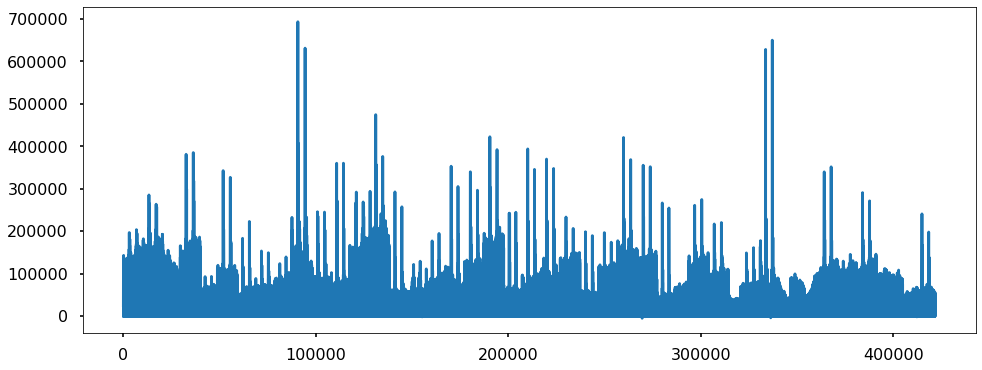

In [103]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

### CAT BOOST REGRESSOR

In [104]:
!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 13.4 MB 12.4 MB/s
  Created wheel for Theano: filename=Theano-1.0.5+unknown-py3-none-any.whl size=2667300 sha256=3313478c045a107266bdc3a746284a0b4454f728a8769d2df72cf175e939f8be
  Stored in directory: /tmp/pip-ephem-wheel-cache-mq1dbw6z/wheels/d1/38/85/558fc0e4d0c26db812304f163e348fb242767d3ea27da937fe
Successfully built Theano


In [105]:
import theano
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #Dropout not used yet
from keras.layers import Conv2D, MaxPooling2D #does not know when to use MaxPooling yet
from keras.losses import categorical_crossentropy #loss function normally used for classification problems, some other can be tried
from tensorflow.keras.optimizers import Adam #very powerful optimizer (link to an article comparing it to others)
from keras.callbacks import EarlyStopping #to stop the algorithm sooner if the cnn does not improve for some time
                                        #it is inevitable to explain the concept of callback
from keras.callbacks import History #for tracing the loss
from keras.utils import to_categorical #needed for converting labels into a good format

    
import numpy as np
import pandas as pd #for data handling
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler 

In [106]:
from pathlib import Path  
filepath = Path('out.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [107]:
df.to_csv(index=False)

In [108]:
train = pd.read_csv('out.csv',low_memory=False)

In [109]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 56 kB/s 


In [110]:
from google.colab import output
output.enable_custom_widget_manager()

In [111]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(learning_rate=0.1, depth=10, iterations=2000)

# 
cats = X.select_dtypes(include=["object"]).columns.tolist()
# Fit model
model = model.fit(X_train, y_train, cats, plot=True)
#model.set_feature_names(y_train)
# Get predictions
y_pred_cat = model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 21848.4361921	total: 565ms	remaining: 18m 49s
1:	learn: 20939.3396979	total: 1.19s	remaining: 19m 44s
2:	learn: 20146.8439143	total: 1.74s	remaining: 19m 17s
3:	learn: 19396.6048938	total: 2.31s	remaining: 19m 15s
4:	learn: 18802.1709956	total: 3.05s	remaining: 20m 16s
5:	learn: 17932.7397059	total: 3.53s	remaining: 19m 33s
6:	learn: 17495.7198960	total: 4.11s	remaining: 19m 30s
7:	learn: 16796.6518312	total: 4.61s	remaining: 19m 6s
8:	learn: 16437.7018061	total: 4.96s	remaining: 18m 17s
9:	learn: 16137.2883121	total: 5.52s	remaining: 18m 18s
10:	learn: 15869.9366675	total: 6.15s	remaining: 18m 32s
11:	learn: 15547.2160447	total: 6.64s	remaining: 18m 20s
12:	learn: 15335.0544312	total: 7.28s	remaining: 18m 32s
13:	learn: 14845.1549986	total: 7.86s	remaining: 18m 34s
14:	learn: 14663.0884682	total: 8.31s	remaining: 18m 19s
15:	learn: 14299.3894699	total: 8.96s	remaining: 18m 30s
16:	learn: 14149.2252097	total: 9.46s	remaining: 18m 24s
17:	learn: 13806.8471766	total: 10.1s	rema

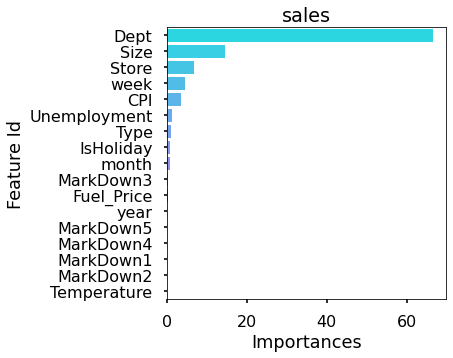

In [112]:
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(5, 5));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('sales');

In [113]:
import catboost
from sklearn.metrics import r2_score, mean_squared_error
import math

#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_pred_cat))
#R2 Score
r2_test = r2_score(y_test,y_pred_cat)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
pred = model.predict(X_test)
print('Testing performance') 
print("Evaluation on test data")

print("RMSE: {:.3f}".format(Rmse_test))
print("R2: {:.3f}".format(r2_test))
print("Adjusted R2: {:.3f}".format(adj_r2_test))

Testing performance
Evaluation on test data
RMSE: 4404.472
R2: 0.960
Adjusted R2: 0.960
